In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywt
from skimage.transform import resize
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
#%%========== Import V-I Data ================================================
data_length = 1000
sample_rate = 2e-6

t = np.arange(0, (data_length-0.5) * sample_rate, sample_rate)

# I_sin_1k = pd.read_csv('data/raw/I(sin_1k_hiB).csv',header=None).iloc[:,1:data_length+1]
# I_sin_2k = pd.read_csv('data/raw/I(sin_2k_hiB).csv',header=None).iloc[:,1:data_length+1]
I_sin_5k = pd.read_csv('data/raw/I(sin_5k_hiB).csv',header=None).iloc[:,1:data_length+1]
# V_sin_1k = pd.read_csv('data/raw/V(sin_1k_hiB).csv',header=None).iloc[:,1:data_length+1]
# V_sin_2k = pd.read_csv('data/raw/V(sin_2k_hiB).csv',header=None).iloc[:,1:data_length+1]
V_sin_5k = pd.read_csv('data/raw/V(sin_5k_hiB).csv',header=None).iloc[:,1:data_length+1]

# I_tri_1k = pd.read_csv('data/raw/I(tri_1k_hiB).csv',header=None).iloc[:,1:data_length+1]
# I_tri_2k = pd.read_csv('data/raw/I(tri_2k_hiB).csv',header=None).iloc[:,1:data_length+1]
I_tri_5k = pd.read_csv('data/raw/I(tri_5k_hiB).csv',header=None).iloc[:,1:data_length+1]
# V_tri_1k = pd.read_csv('data/raw/V(tri_1k_hiB).csv',header=None).iloc[:,1:data_length+1]
# V_tri_2k = pd.read_csv('data/raw/V(tri_2k_hiB).csv',header=None).iloc[:,1:data_length+1]
V_tri_5k = pd.read_csv('data/raw/V(tri_5k_hiB).csv',header=None).iloc[:,1:data_length+1]

# I_trap_1k = pd.read_csv('data/raw/I(trap_1k_hiB).csv',header=None).iloc[:,1:data_length+1]
# I_trap_2k = pd.read_csv('data/raw/I(trap_2k_hiB).csv',header=None).iloc[:,1:data_length+1]
I_trap_5k = pd.read_csv('data/raw/I(trap_5k_hiB).csv',header=None).iloc[:,1:data_length+1]
# V_trap_1k = pd.read_csv('data/raw/V(trap_1k_hiB).csv',header=None).iloc[:,1:data_length+1]
# V_trap_2k = pd.read_csv('data/raw/V(trap_2k_hiB).csv',header=None).iloc[:,1:data_length+1]
V_trap_5k = pd.read_csv('data/raw/V(trap_5k_hiB).csv',header=None).iloc[:,1:data_length+1]

I = pd.concat([I_sin_5k , I_tri_5k , I_trap_5k], ignore_index=True)
V = pd.concat([V_sin_5k , V_tri_5k , V_trap_5k], ignore_index=True)

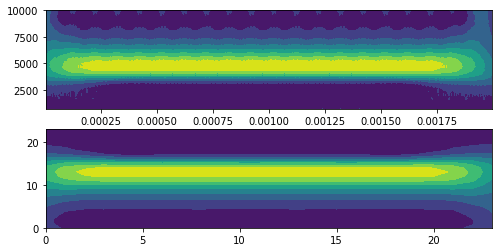

In [3]:
#%%========== Display Scalogram (uncomment when needed) ======================
signal = V_trap_5k.iloc[100, 1:1002]

wave_name = 'cgau8'
total_scale = 30
fc = pywt.central_frequency(wave_name)
fmax = 10e3
cparam = (1 / sample_rate) / fmax * fc * total_scale
scales = cparam / np.arange(total_scale, 1, -1)
[cwtmatr, frequencies] = pywt.cwt(signal, scales, wave_name, sample_rate)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.contourf(t[1:1000], frequencies, abs(cwtmatr))
plt.subplot(212)
image_size = 24
plt.contourf(resize(abs(cwtmatr), (image_size, image_size)))
plt.show()

In [4]:
#%%========== Compute Measured Loss ==========================================
P = V * I
data_size = np.size(P, 0)
Loss_meas = np.zeros(data_size)
for index, row in P.iterrows():
    Loss_meas[index] = np.trapz(row, t) / (sample_rate * data_length)

In [5]:
#%%========== Create Scalograms ==============================================
wave_name = 'cgau8'
total_scale = 30
fc = pywt.central_frequency(wave_name)
fmax = 10e3
cparam = (1 / sample_rate) / fmax * fc * total_scale
scales = cparam / np.arange(total_scale, 1, -1)

image_size = 24
scalogram = np.zeros([data_size, image_size, image_size])
for index, row in V.iterrows():
    [cwtmatr, frequencies] = pywt.cwt(row, scales, wave_name, sample_rate)
    scalogram[index:, :, ] = resize(abs(cwtmatr), (image_size, image_size))
    if index % 100 == 0:
        print(f"Index {index} finished")

0 finished
1 finished
2 finished
3 finished
4 finished
5 finished
6 finished
7 finished
8 finished
9 finished
10 finished
11 finished
12 finished
13 finished
14 finished
15 finished
16 finished
17 finished
18 finished
19 finished
20 finished
21 finished
22 finished
23 finished
24 finished
25 finished
26 finished
27 finished
28 finished
29 finished
30 finished
31 finished
32 finished
33 finished
34 finished
35 finished
36 finished
37 finished
38 finished
39 finished
40 finished
41 finished
42 finished
43 finished
44 finished
45 finished
46 finished
47 finished
48 finished
49 finished
50 finished
51 finished
52 finished
53 finished
54 finished
55 finished
56 finished
57 finished
58 finished
59 finished
60 finished
61 finished
62 finished
63 finished
64 finished
65 finished
66 finished
67 finished
68 finished
69 finished
70 finished
71 finished
72 finished
73 finished
74 finished
75 finished
76 finished
77 finished
78 finished
79 finished
80 finished
81 finished
82 finished
83 finished
84

643 finished
644 finished
645 finished
646 finished
647 finished
648 finished
649 finished
650 finished
651 finished
652 finished
653 finished
654 finished
655 finished
656 finished
657 finished
658 finished
659 finished
660 finished
661 finished
662 finished
663 finished
664 finished
665 finished
666 finished
667 finished
668 finished
669 finished
670 finished
671 finished
672 finished
673 finished
674 finished
675 finished
676 finished
677 finished
678 finished
679 finished
680 finished
681 finished
682 finished
683 finished
684 finished
685 finished
686 finished
687 finished
688 finished
689 finished
690 finished
691 finished
692 finished
693 finished
694 finished
695 finished
696 finished
697 finished
698 finished
699 finished
700 finished
701 finished
702 finished
703 finished
704 finished
705 finished
706 finished
707 finished
708 finished
709 finished
710 finished
711 finished
712 finished
713 finished
714 finished
715 finished
716 finished
717 finished
718 finished
719 finished

1258 finished
1259 finished
1260 finished
1261 finished
1262 finished
1263 finished
1264 finished
1265 finished
1266 finished
1267 finished
1268 finished
1269 finished
1270 finished
1271 finished
1272 finished
1273 finished
1274 finished
1275 finished
1276 finished
1277 finished
1278 finished
1279 finished
1280 finished
1281 finished
1282 finished
1283 finished
1284 finished
1285 finished
1286 finished
1287 finished
1288 finished
1289 finished
1290 finished
1291 finished
1292 finished
1293 finished
1294 finished
1295 finished
1296 finished
1297 finished
1298 finished
1299 finished
1300 finished
1301 finished
1302 finished
1303 finished
1304 finished
1305 finished
1306 finished
1307 finished
1308 finished
1309 finished
1310 finished
1311 finished
1312 finished
1313 finished
1314 finished
1315 finished
1316 finished
1317 finished
1318 finished
1319 finished
1320 finished
1321 finished
1322 finished
1323 finished
1324 finished
1325 finished
1326 finished
1327 finished
1328 finished
1329 f

1844 finished
1845 finished
1846 finished
1847 finished
1848 finished
1849 finished
1850 finished
1851 finished
1852 finished
1853 finished
1854 finished
1855 finished
1856 finished
1857 finished
1858 finished
1859 finished
1860 finished
1861 finished
1862 finished
1863 finished
1864 finished
1865 finished
1866 finished
1867 finished
1868 finished
1869 finished
1870 finished
1871 finished
1872 finished
1873 finished
1874 finished
1875 finished
1876 finished
1877 finished
1878 finished
1879 finished
1880 finished
1881 finished
1882 finished
1883 finished
1884 finished
1885 finished
1886 finished
1887 finished
1888 finished
1889 finished
1890 finished
1891 finished
1892 finished
1893 finished
1894 finished
1895 finished
1896 finished
1897 finished
1898 finished
1899 finished
1900 finished
1901 finished
1902 finished
1903 finished
1904 finished
1905 finished
1906 finished
1907 finished
1908 finished
1909 finished
1910 finished
1911 finished
1912 finished
1913 finished
1914 finished
1915 f

2436 finished
2437 finished
2438 finished
2439 finished
2440 finished
2441 finished
2442 finished
2443 finished
2444 finished
2445 finished
2446 finished
2447 finished
2448 finished
2449 finished
2450 finished
2451 finished
2452 finished
2453 finished
2454 finished
2455 finished
2456 finished
2457 finished
2458 finished
2459 finished
2460 finished
2461 finished
2462 finished
2463 finished
2464 finished
2465 finished
2466 finished
2467 finished
2468 finished
2469 finished
2470 finished
2471 finished
2472 finished
2473 finished
2474 finished
2475 finished
2476 finished
2477 finished
2478 finished
2479 finished
2480 finished
2481 finished
2482 finished
2483 finished
2484 finished
2485 finished
2486 finished
2487 finished
2488 finished
2489 finished
2490 finished
2491 finished
2492 finished
2493 finished
2494 finished
2495 finished
2496 finished
2497 finished
2498 finished
2499 finished
2500 finished
2501 finished
2502 finished
2503 finished
2504 finished
2505 finished
2506 finished
2507 f

3022 finished
3023 finished
3024 finished
3025 finished
3026 finished
3027 finished
3028 finished
3029 finished
3030 finished
3031 finished
3032 finished
3033 finished
3034 finished
3035 finished
3036 finished
3037 finished
3038 finished
3039 finished
3040 finished
3041 finished
3042 finished
3043 finished
3044 finished
3045 finished
3046 finished
3047 finished
3048 finished
3049 finished
3050 finished
3051 finished
3052 finished
3053 finished
3054 finished
3055 finished
3056 finished
3057 finished
3058 finished
3059 finished
3060 finished
3061 finished
3062 finished
3063 finished
3064 finished
3065 finished
3066 finished
3067 finished
3068 finished
3069 finished
3070 finished
3071 finished
3072 finished
3073 finished
3074 finished
3075 finished
3076 finished
3077 finished
3078 finished
3079 finished
3080 finished
3081 finished
3082 finished
3083 finished
3084 finished
3085 finished
3086 finished
3087 finished
3088 finished
3089 finished
3090 finished
3091 finished
3092 finished
3093 f

3613 finished
3614 finished
3615 finished
3616 finished
3617 finished
3618 finished
3619 finished
3620 finished
3621 finished
3622 finished
3623 finished
3624 finished
3625 finished
3626 finished
3627 finished
3628 finished
3629 finished
3630 finished
3631 finished
3632 finished
3633 finished
3634 finished
3635 finished
3636 finished
3637 finished
3638 finished
3639 finished
3640 finished
3641 finished
3642 finished
3643 finished
3644 finished
3645 finished
3646 finished
3647 finished
3648 finished
3649 finished
3650 finished
3651 finished
3652 finished
3653 finished
3654 finished
3655 finished
3656 finished
3657 finished
3658 finished
3659 finished
3660 finished
3661 finished
3662 finished
3663 finished
3664 finished
3665 finished
3666 finished
3667 finished
3668 finished
3669 finished
3670 finished
3671 finished
3672 finished
3673 finished
3674 finished
3675 finished
3676 finished
3677 finished
3678 finished
3679 finished
3680 finished
3681 finished
3682 finished
3683 finished
3684 f

In [6]:
#%%========== Config the Neural Network ======================================
# function to count number of parameters
# def get_n_params(model):
#     np=0
#     for p in list(model.parameters()):
#         np += p.nelement()
#     return np

input_size  = image_size * image_size   # images in NxN pixels
output_size = 1      # 1 regression output

Dataset = torch.utils.data.TensorDataset(torch.from_numpy(scalogram), torch.from_numpy(Loss_meas))
train_size = int(0.7 * data_size)
test_size = data_size - train_size
train_db, test_db = torch.utils.data.random_split(Dataset, [train_size, test_size])
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_db, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_db, batch_size=1, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=2)
        self.batch_norm1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=2)
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=2)
        self.batch_norm3 = nn.BatchNorm2d(16)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(256, 8)
        self.fc2 = nn.Linear(8, 1)
    def forward(self, x):
        x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))
        x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))
        x = self.pool(F.relu(self.batch_norm3(self.conv3(x))))
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        # x = self.drop_out(x)
        x = self.fc2(x)
        return x

net = Net().double()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

#%%========== Train the Neural Network =======================================
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.view(-1, 1, 24, 24)
        labels = labels.view(-1, 1)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
            running_loss = 0.0

print('Finished Training')

# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)

# net = Net()
# net.load_state_dict(torch.load(PATH))

[1,    20] loss: 0.598
[1,    40] loss: 0.078
[2,    20] loss: 0.072
[2,    40] loss: 0.072
[3,    20] loss: 0.057
[3,    40] loss: 0.070
[4,    20] loss: 0.060
[4,    40] loss: 0.063
[5,    20] loss: 0.061
[5,    40] loss: 0.064
[6,    20] loss: 0.064
[6,    40] loss: 0.065
[7,    20] loss: 0.063
[7,    40] loss: 0.059
[8,    20] loss: 0.056
[8,    40] loss: 0.050
[9,    20] loss: 0.055
[9,    40] loss: 0.052
[10,    20] loss: 0.051
[10,    40] loss: 0.047
Finished Training


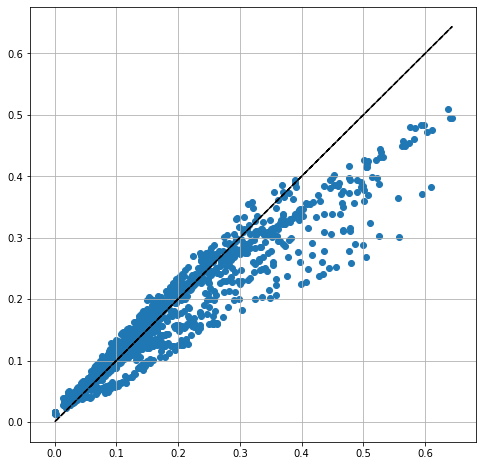

In [7]:
#%%========== Test the Neural Network ========================================
net.eval()
with torch.no_grad():
    y_meas = np.zeros(test_size)
    y_pred = np.zeros(test_size)
    index = 0
    for index, (inputs, labels) in enumerate(test_loader, 0):
        inputs = inputs.view(-1, 1, 24, 24)
        y_pred[index] = net(inputs)
        y_meas[index] = labels
        
plt.figure(figsize = (8,8))
plt.subplot()
plt.scatter(y_meas, y_pred)
plt.plot(y_meas, y_meas, 'k--')
plt.grid(True)
plt.show()